In [3]:
#workshop 1

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['class'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

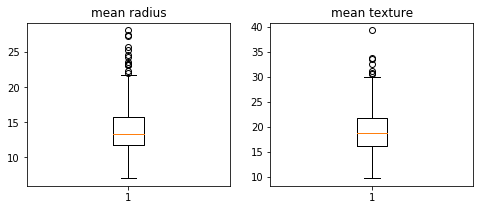

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3))
ax1.set_title('mean radius')
ax1.boxplot(df['mean radius'])

ax2.set_title('mean texture')
ax2.boxplot(df['mean texture'])
plt.show()

In [9]:
df = df[df['mean radius'] < 25]
df = df[df['mean texture'] < 38]
df.shape

(563, 31)

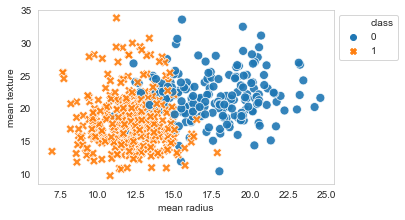

In [10]:
sb.set_style('whitegrid')
plt.figure(figsize=(5.3, 3.2))

sb.scatterplot('mean radius', 'mean texture', data=df, hue='class', style='class',
              alpha=0.9, edgecolor='w', s=80)
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [11]:
#workshop 2

In [12]:
df['mean ra'] = np.where(df['class']==0, df['mean radius'] + 7.5, df['mean radius'])
df['mean ra'].head(3)

0    25.49
1    28.07
2    27.19
Name: mean ra, dtype: float64

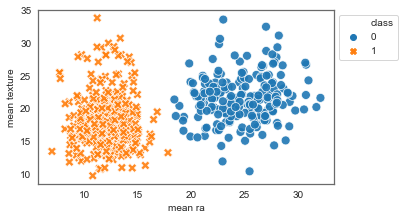

In [13]:
plt.figure(figsize=(5.3, 3.2))
plt.rcParams['axes.edgecolor'] = '150'
plt.rcParams['axes.linewidth'] = '1.25'

sb.scatterplot('mean ra', 'mean texture', data=df, hue='class', style='class',
              alpha=0.9, edgecolor='w', s=80)

plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [14]:
columns = ['mean ra', 'mean texture']
X = df[columns]
y = df['class']
X.shape, y.shape, y.unique()

((563, 2), (563,), array([0, 1]))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print('Score {:.3f}'.format(model.score(X_test, y_test)))

Score 1.000


In [20]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        63
         Yes       1.00      1.00      1.00       106

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



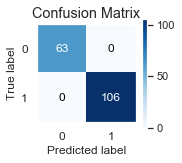

In [21]:
import scikitplot as skplot
sb.set(rc={'figure.figsize': (2.2,2)})
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
model = LogisticRegression(solver='lbfgs')
cvs = cross_val_score(model, X, y, cv=10)
print('cross_val_score {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}'.format(cvs.mean()*100))

cross_val_score [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average (%) = 100.00


In [24]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob[:,1])
y_pred_prob[:10].round(3)

array([[0.001, 0.999],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.903, 0.097],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ]])

In [26]:
df_result = pd.DataFrame(y_test)
df_result['y_pred'] = y_pred
df_result['y_pred_prob_0'] = y_pred_prob[:,0]
df_result['y_pred_prob_1'] = y_pred_prob[:,1]
df_result.head().round(3)

,class,y_pred,y_pred_prob_0,y_pred_prob_1
395,1,1,0.001,0.999
266,1,1,0.000,1.000
460,0,0,1.000,0.000
293,1,1,0.000,1.000
78,0,0,1.000,0.000


In [27]:
from sklearn.metrics import roc_curve, auc

In [28]:
ll=[0,1]
ur=[0,1]

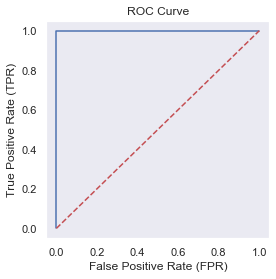

In [29]:
plt.figure(figsize=(4,4))
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.plot(ll, ur, '--r')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(False)
plt.show()

In [30]:
auc_value = auc(fpr, tpr)
auc_value

1.0

In [31]:
#workshop 3

In [32]:
df['mean ra'] = df['mean radius']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class,mean ra
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,17.99
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,20.57
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,19.69
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,11.42
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,20.29


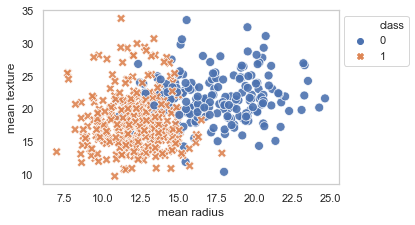

In [35]:
sb.set_style('whitegrid')
plt.figure(figsize=(5.3, 3.2))

sb.scatterplot('mean radius', 'mean texture', data=df, hue='class', style='class',
              alpha=0.9, edgecolor='w', s=80)
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [38]:
df['mean ra'] = df['mean radius']

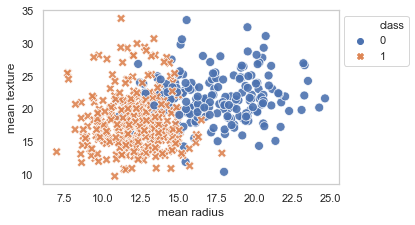

In [39]:
sb.set_style('whitegrid')
plt.figure(figsize=(5.3, 3.2))

sb.scatterplot('mean radius', 'mean texture', data=df, hue='class', style='class',
              alpha=0.9, edgecolor='w', s=80)
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [40]:
columns = ['mean ra', 'mean texture']
X = df[columns]
y = df['class']
X.shape, y.shape, y.unique()

((563, 2), (563,), array([0, 1]))

In [41]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
threshold = 0.98
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > threshold
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.38      1.00      0.55        63
         Yes       1.00      0.01      0.02       106

    accuracy                           0.38       169
   macro avg       0.69      0.50      0.28       169
weighted avg       0.77      0.38      0.22       169



In [60]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 63   0]
 [105   1]]
